In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from utils import *

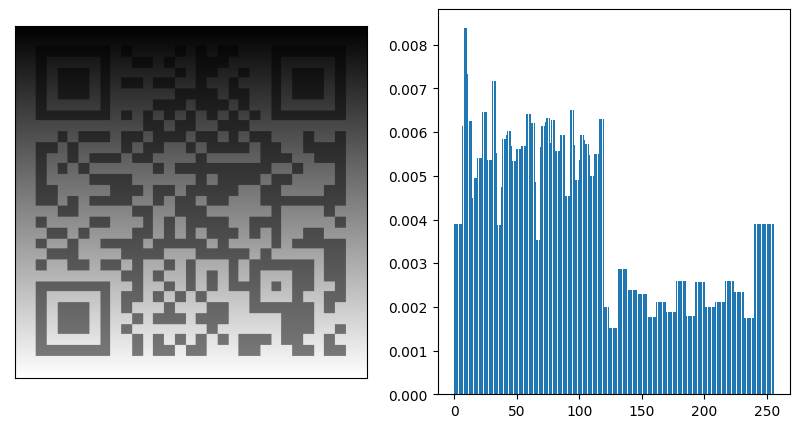

In [2]:
QRCode = cv2.imread("./imgs/QRCode.png")

mask = np.arange(256) / 255
QRCode = np.clip((QRCode * 0.5 + 128) * mask[:, None, None], 0, 255).astype(np.uint8)
QRhist = get_hist_multiple_channel(QRCode)

show_histogram([QRhist[0]], QRCode)

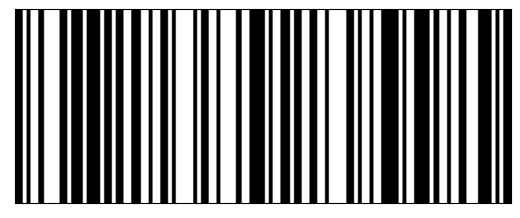

In [3]:
barcode = cv2.imread('./imgs/barcode.jpg', cv2.IMREAD_GRAYSCALE)
barcode = cv2.resize(barcode, (256, 100))
barcode[barcode>=128] = 255
barcode[barcode<128] = 0

plt.imshow(barcode, cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()

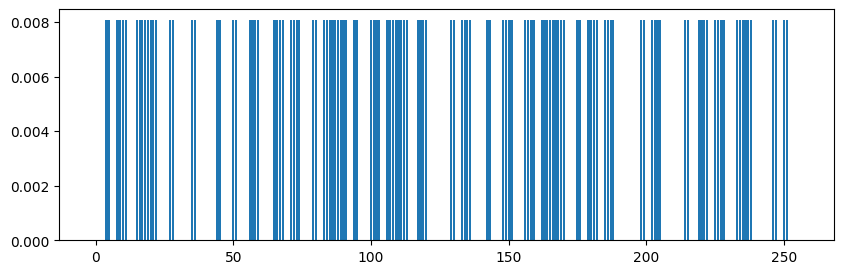

In [4]:
barcode_bin = barcode[0]
barhist = barcode_bin / 255 
sumbar = sum(barhist)
barhist = barhist / sumbar
show_histogram([barhist], figsize=(10, 3))

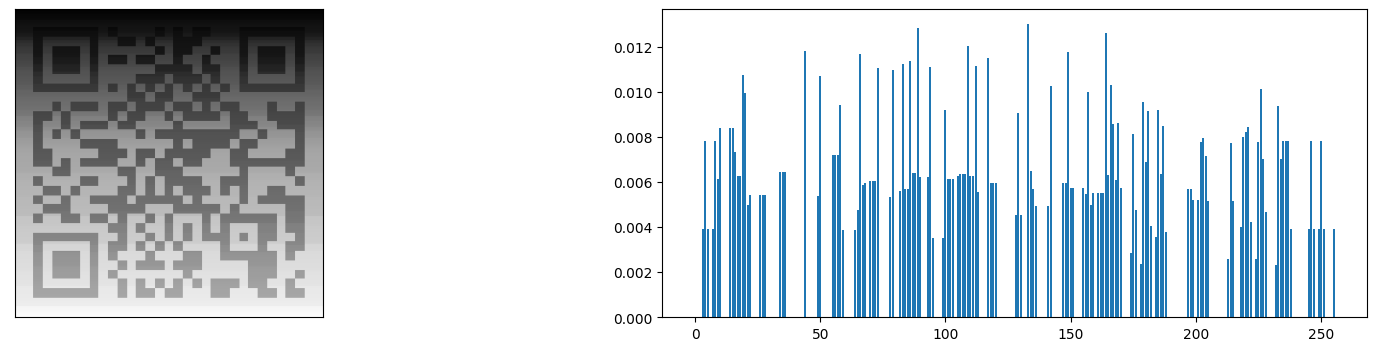

In [5]:
_, new_QRCode = specialize_hists([barhist, barhist, barhist], QRhist, QRCode)
new_QRhist = get_hist_multiple_channel(new_QRCode)

show_histogram([new_QRhist[0]], new_QRCode, figsize=(20, 4))

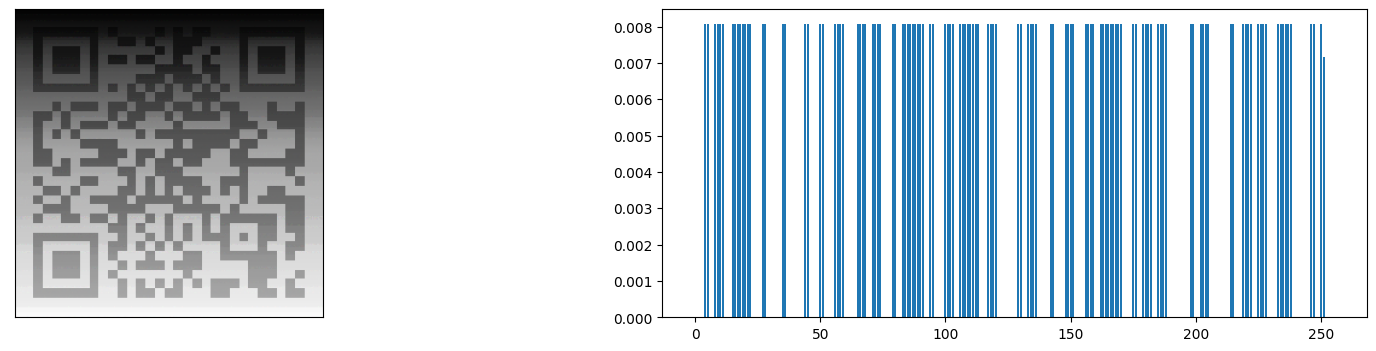

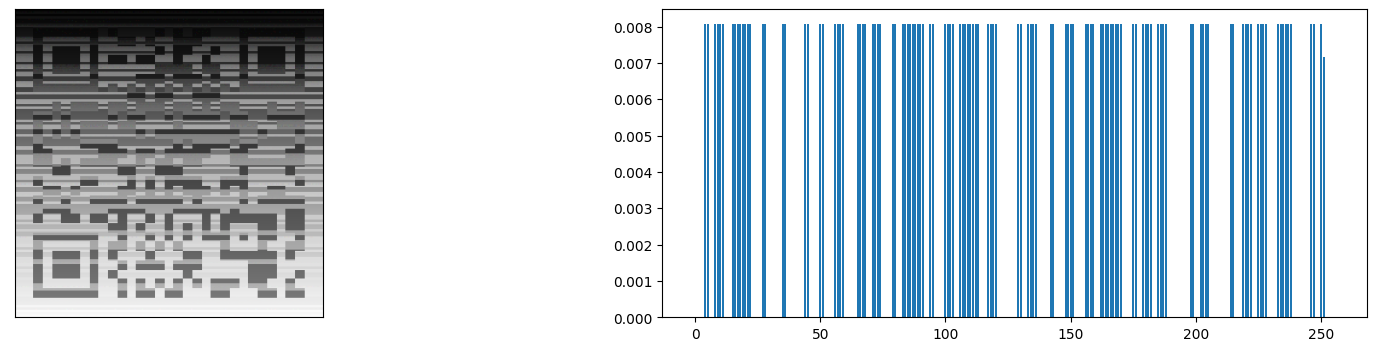

In [6]:
modified_QRCode = exact_specialize_hists_multiple_channel([barhist, barhist, barhist], new_QRCode)
modified_QRCode_raw = exact_specialize_hists_multiple_channel([barhist, barhist, barhist], QRCode)
modified_QRhist = get_hist_multiple_channel(modified_QRCode)
modified_QRhist_raw = get_hist_multiple_channel(modified_QRCode)

show_histogram([modified_QRhist[0]], modified_QRCode, figsize=(20, 4))
show_histogram([modified_QRhist_raw[0]], modified_QRCode_raw, figsize=(20, 4))